Columns and Data Types:
Date               object
Location           object
Country            object
Temperature       float64
CO2 Emissions     float64
Sea Level Rise    float64
Precipitation     float64
Humidity          float64
Wind Speed        float64
dtype: object

First few rows:


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164



Using column 'Temperature' for trend analysis.


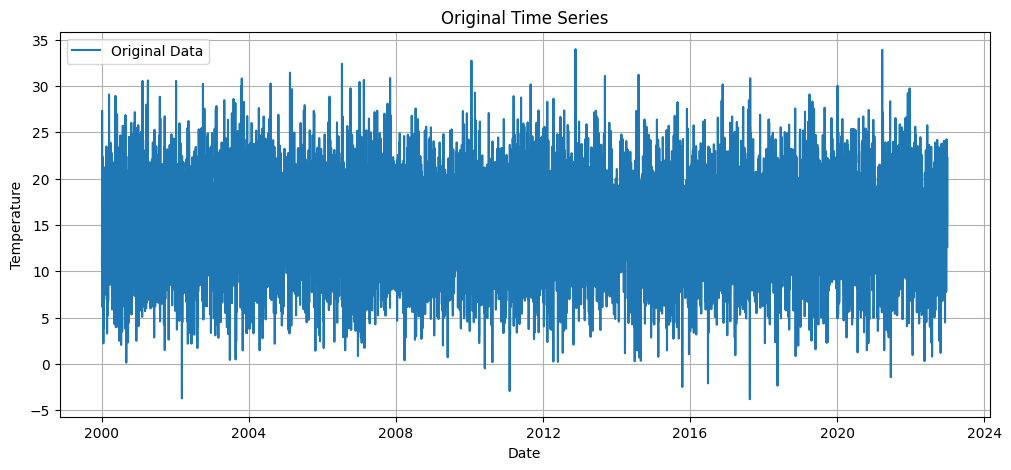

<ipython-input-6-97eb54d2bbab>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg = numeric_df[value_col].resample('M').mean()


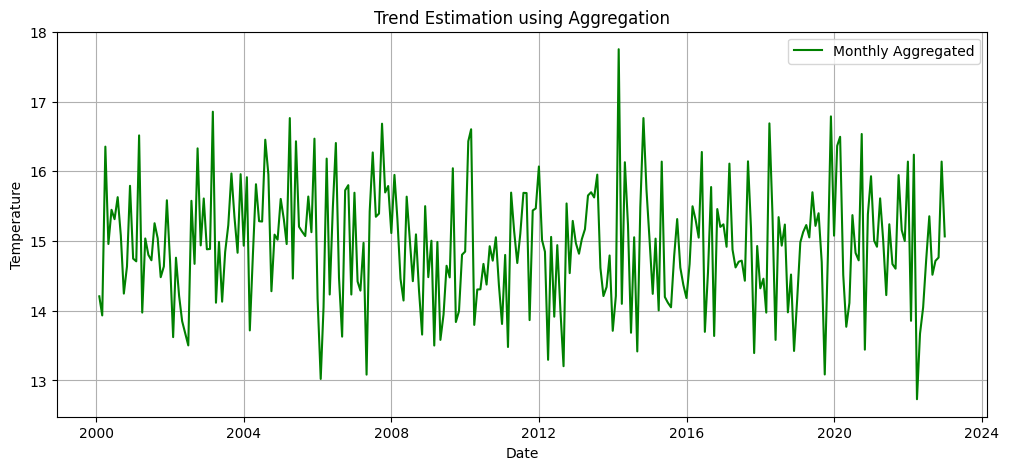

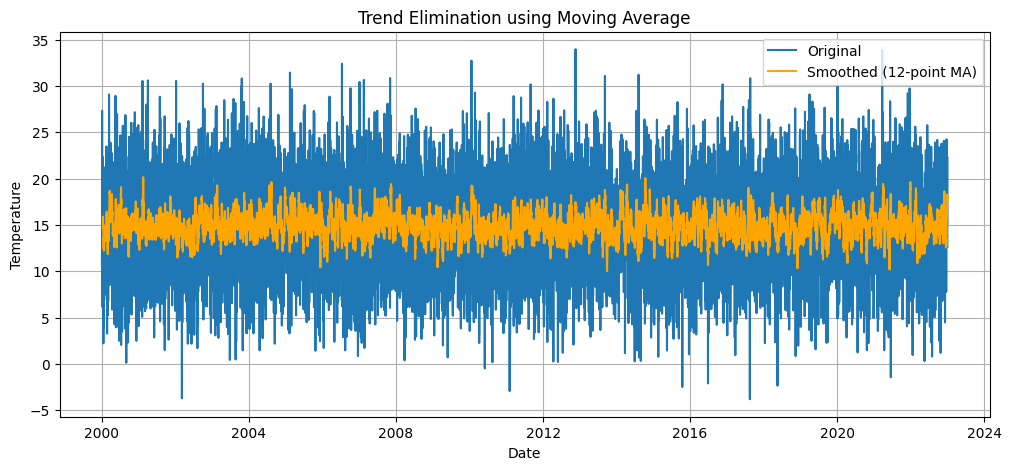

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/climate_change_data.csv'
df = pd.read_csv(file_path)

# Show column names and data types
print("Columns and Data Types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

# Convert first column to datetime and set as index
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.set_index(date_col, inplace=True)

# Drop non-numeric columns for analysis
numeric_df = df.select_dtypes(include='number')

# Check if we have numeric data
if numeric_df.empty:
    raise ValueError("No numeric columns found to perform trend analysis!")

# Choose the first numeric column for demonstration
value_col = numeric_df.columns[0]
print(f"\nUsing column '{value_col}' for trend analysis.")

# Plot original data
plt.figure(figsize=(12, 5))
plt.plot(numeric_df[value_col], label='Original Data')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel(value_col)
plt.grid(True)
plt.legend()
plt.show()

# -------- Aggregation (monthly) --------
monthly_agg = numeric_df[value_col].resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_agg, label='Monthly Aggregated', color='green')
plt.title('Trend Estimation using Aggregation')
plt.xlabel('Date')
plt.ylabel(value_col)
plt.grid(True)
plt.legend()
plt.show()

# -------- Smoothing (moving average) --------
window_size = 12
numeric_df['Smoothed'] = numeric_df[value_col].rolling(window=window_size).mean()

plt.figure(figsize=(12, 5))
plt.plot(numeric_df[value_col], label='Original')
plt.plot(numeric_df['Smoothed'], label='Smoothed (12-point MA)', color='orange')
plt.title('Trend Elimination using Moving Average')
plt.xlabel('Date')
plt.ylabel(value_col)
plt.grid(True)
plt.legend()
plt.show()
